In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

In [8]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD1PNAmp(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

586 µs ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%timeit bilby.gw.source.lal_TaylorF2EccPerAdvFD(np.array([20,30,40]), 6.5, 5.8, 0.1, 200, 0.4, 1.3)

326 µs ± 32.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [4]:
############# my waveform model ################
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200.,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='PeriastronEccFD',
                          reference_frequency=0., minimum_frequency=10.)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_PeriastronEccFD,
    parameters=injection_parameters, waveform_arguments=waveform_arguments)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

13:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_PeriastronEccFD
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal in H1:
13:11 bilby INFO    :   optimal SNR = 31.88
13:11 bilby INFO    :   matched filter SNR = 30.59+0.30j
13:11 bilby INFO    :   mass_1 = 6.5
13:11 bilby INFO    :   mass_2 = 5.8
13:11 bilby INFO    :   eccentricity = 0.1
13:11 bilby INFO    :   luminosity_distance = 200.0
13:11 bilby INFO    :   theta_jn = 0.4
13:11 bilby INFO    :   psi = 2.659
13:11 bilby INFO    :   phase = 1.3
13:11 bilby INFO    :   geocent_time = 1126259642.413
13:11 bilby INFO    :   ra = 1.375
13:11 bilby INFO    :   dec = -1.2108
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.96530394e-24+1.08286830e-24j, -1.96862699e-24+1.07545409e-24j,
         -1.97191972e-24+1.06803591e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.07921762e-24-1.95867830e-24j, -1.07182840e-24-1.96199014e-24j,
         -1.06443523e-24-1.96527178e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.96530394e-24+1.08286830e-24j, -1.96862699e-24+1.07545409e-24j,
         -1.97191972e-24+1.06803591e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.07921762e-24-1.95867830e-24j, -1.07182840e-24-1.96199014e-24j,
         -1.06443523e-24-1.96527178e-24j])}]

In [4]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

In [4]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.017627926081914

In [5]:
############# TaylorF2Eccn waveform model ################
injection_parameters2 = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.1, luminosity_distance=200., a_1=0.0, a_2=0.0, theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments2 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2Ecc_fd,
    parameters=injection_parameters2, waveform_arguments=waveform_arguments2)

ifos2 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos2.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)

13:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2Ecc_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal in H1:
13:11 bilby INFO    :   optimal SNR = 31.91
13:11 bilby INFO    :   matched filter SNR = 30.80+0.23j
13:11 bilby INFO    :   mass_1 = 6.5
13:11 bilby INFO    :   mass_2 = 5.8
13:11 bilby INFO    :   eccentricity = 0.1
13:11 bilby INFO    :   luminosity_distance = 200.0
13:11 bilby INFO    :   a_1 = 0.0
13:11 bilby INFO    :   a_2 = 0.0
13:11 bilby INFO    :   theta_jn = 0.4
13:11 bilby INFO    :   psi = 2.659
13:11 bilby INFO    :   phase = 1.3
13:11 bilby INFO    :   geocent_time = 1126259642.413
13:11 bilby INFO    :   ra = 1.375
13:11 bilby INFO    :   dec = -1.2108
13:11 bilby INFO    : Generation of spin parameters 

[{'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.54636396e-24-1.64976581e-24j, 1.54811817e-24-1.64723585e-24j,
         1.54986424e-24-1.64470852e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.64420394e-24-1.54115069e-24j, -1.64168252e-24-1.54289898e-24j,
         -1.63916370e-24-1.54463917e-24j])},
 {'plus': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.54636396e-24-1.64976581e-24j, 1.54811817e-24-1.64723585e-24j,
         1.54986424e-24-1.64470852e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.64420394e-24-1.54115069e-24j, -1.64168252e-24-1.54289898e-24j,
         -1.63916370e-24-1.54463917e-24j])}]

In [6]:
snrs = [ifo2.meta_data["optimal_SNR"] for ifo2 in ifos2]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

In [6]:
############# TaylorF2 waveform model ################
injection_parameters3 = dict(
    mass_1=6.5, mass_2=5.8, a_1=0.0, a_2=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments3 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=10., minimum_frequency=10.)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    parameters=injection_parameters3, waveform_arguments=waveform_arguments3)

ifos3 = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos3.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)
ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters3)

13:11 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal in H1:
13:11 bilby INFO    :   optimal SNR = 31.91
13:11 bilby INFO    :   matched filter SNR = 30.76-0.39j
13:11 bilby INFO    :   mass_1 = 6.5
13:11 bilby INFO    :   mass_2 = 5.8
13:11 bilby INFO    :   a_1 = 0.0
13:11 bilby INFO    :   a_2 = 0.0
13:11 bilby INFO    :   luminosity_distance = 200.0
13:11 bilby INFO    :   theta_jn = 0.4
13:11 bilby INFO    :   psi = 2.659
13:11 bilby INFO    :   phase = 1.3
13:11 bilby INFO    :   geocent_time = 1126259642.413
13:11 bilby INFO    :   ra = 1.375
13:11 bilby INFO    :   dec = -1.2108
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.32003849e-26-2.26077474e-24j, -3.49600749e-26-2.26027291e-24j,
         -2.67304192e-26-2.25974131e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25315298e-24+4.30547432e-26j, -2.25265283e-24+3.48422138e-26j,
         -2.25212302e-24+2.66403027e-26j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -4.32003849e-26-2.26077474e-24j, -3.49600749e-26-2.26027291e-24j,
         -2.67304192e-26-2.25974131e-24j]),
  'cross': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -2.25315298e-24+4.30547432e-26j, -2.25265283e-24+3.48422138e-26j,
         -2.25212302e-24+2.66403027e-26j])}]

In [8]:
snrs = [ifo3.meta_data["optimal_SNR"] for ifo3 in ifos3]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999306

13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal in H1:
13:11 bilby INFO    :   optimal SNR = 31.88
13:11 bilby INFO    :   matched filter SNR = 94.36+0.30j
13:11 bilby INFO    :   mass_1 = 6.5
13:11 bilby INFO    :   mass_2 = 5.8
13:11 bilby INFO    :   eccentricity = 0.1
13:11 bilby INFO    :   luminosity_distance = 200.0
13:11 bilby INFO    :   theta_jn = 0.4
13:11 bilby INFO    :   psi = 2.659
13:11 bilby INFO    :   phase = 1.3
13:11 bilby INFO    :   geocent_time = 1126259642.413
13:11 bilby INFO    :   ra = 1.375
13:11 bilby INFO    :   dec = -1.2108
13:11 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:11 bilby INFO    : Injected signal in L1:
13:11 bilby INFO    :   optimal SNR = 25.82
13:11 bilby INFO    :   matched filter SNR = 75.38-0.66j
13:11 bilby INFO    :   mass_1 = 6.5
13:11 bilby INFO    :   mass_2 = 5.8
13:11 bilby INFO    :   eccentricity = 0.1
13:11 bilby INFO    

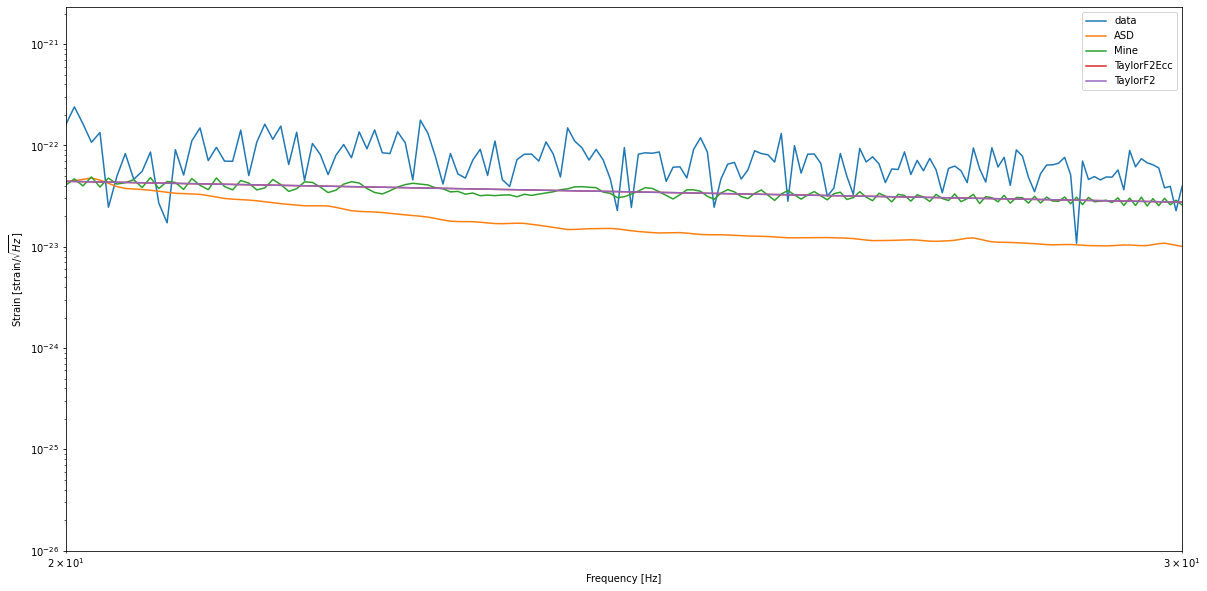

In [8]:
#to plot the frequency domain  
############# my waveform model ################
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)
H1 = ifos[0]
H1_injection = injection[0]
idxs = H1.strain_data.frequency_mask  

############# TaylorF2Ecc ################
injection2 = ifos2.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters2)
H12 = ifos2[0]
H1_injection2 = injection2[0]
idxs2 = H12.strain_data.frequency_mask

############# TaylorF2 waveform model ################
injection3 = ifos3.inject_signal(waveform_generator=waveform_generator3,
                   parameters=injection_parameters2)
H13 = ifos3[0]
H1_injection3 = injection3[0]
idxs3 = H13.strain_data.frequency_mask

############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Ecc waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,30.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

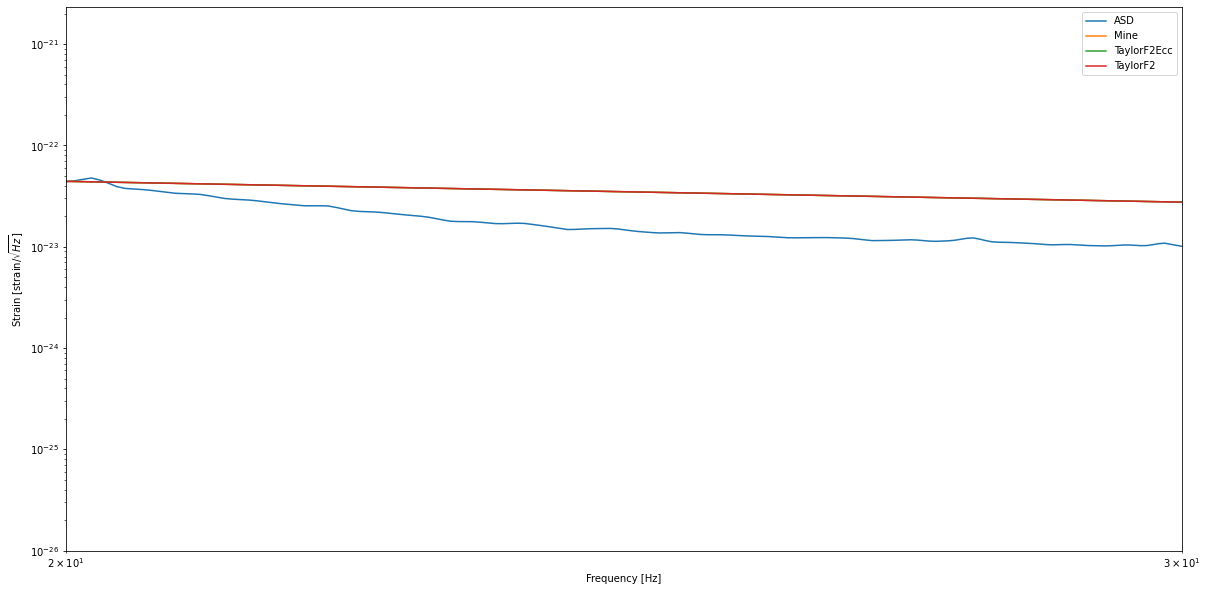

In [16]:
############# my waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")'''
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Ecc waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.abs(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.abs(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(20.,30.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

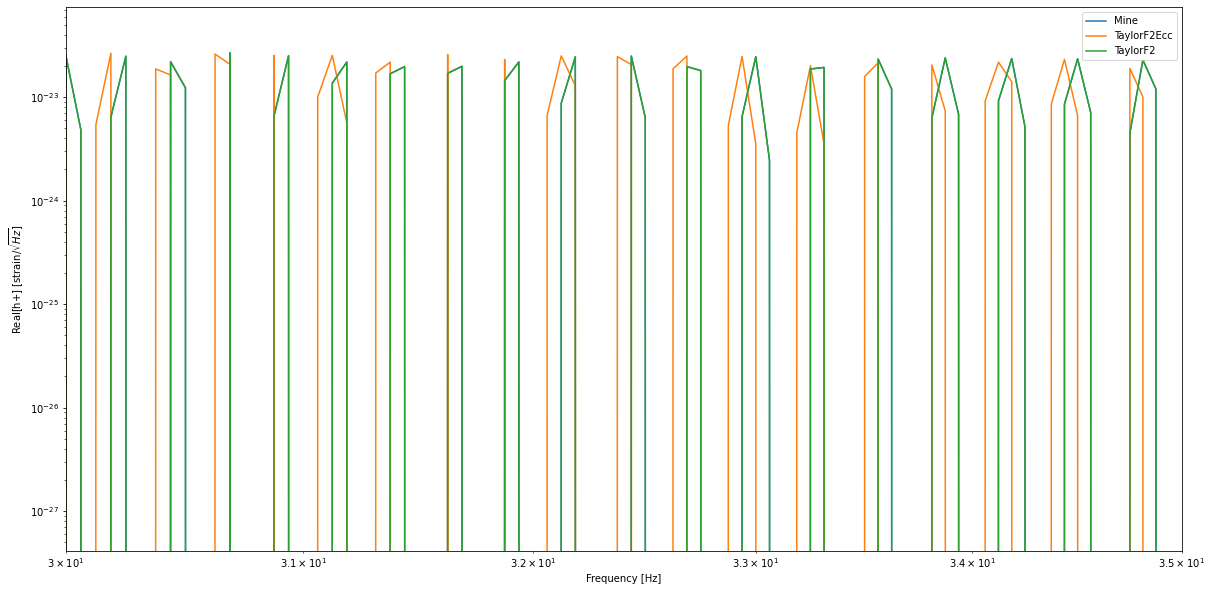

In [17]:
############# my waveform model ################
fig, ax = plt.subplots()

ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Ecc waveform model ################
ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(30.,35.)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

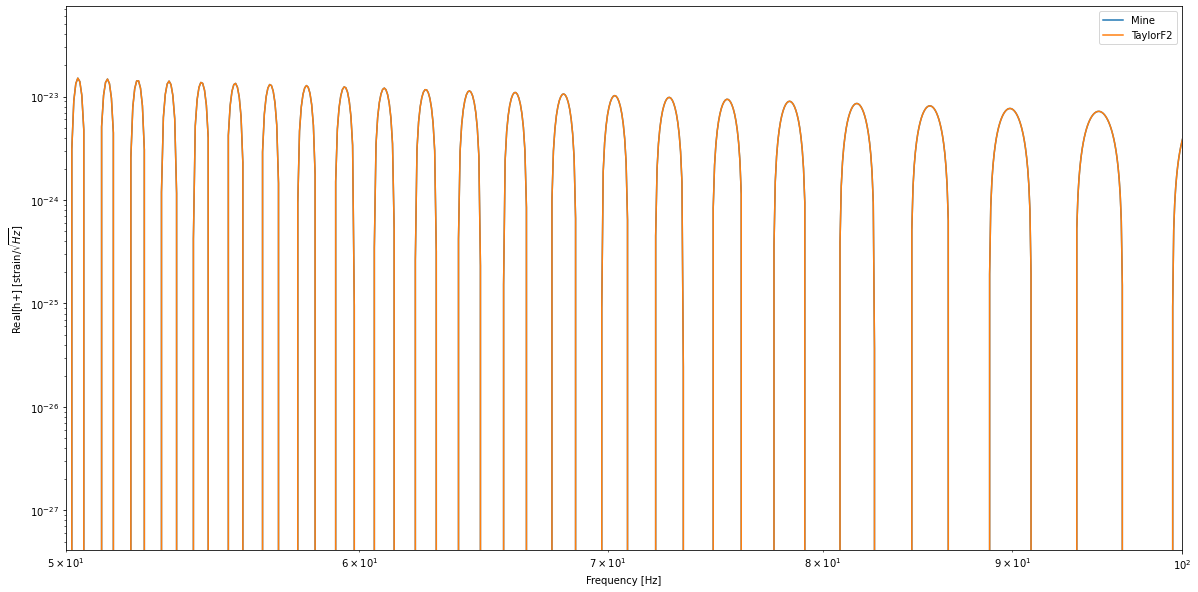

In [18]:
############# my waveform model ################
fig, ax = plt.subplots()

'''ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")'''
ax.loglog(H1.frequency_array[idxs],
          np.real(H1_injection["plus"][idxs]),
          label="Mine")

############# TaylorF2Ecc waveform model ################
'''ax.loglog(H12.frequency_array[idxs2],
          np.real(H1_injection2["plus"][idxs2]),
          label="TaylorF2Ecc")'''

############# TaylorF2 waveform model ################
ax.loglog(H13.frequency_array[idxs3],
          np.real(H1_injection3["plus"][idxs3]),
          label="TaylorF2")

#############################
ax.set_xlim(50.,100.)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Real[h+] [strain/$\sqrt{Hz}$]")
ax.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()